8192


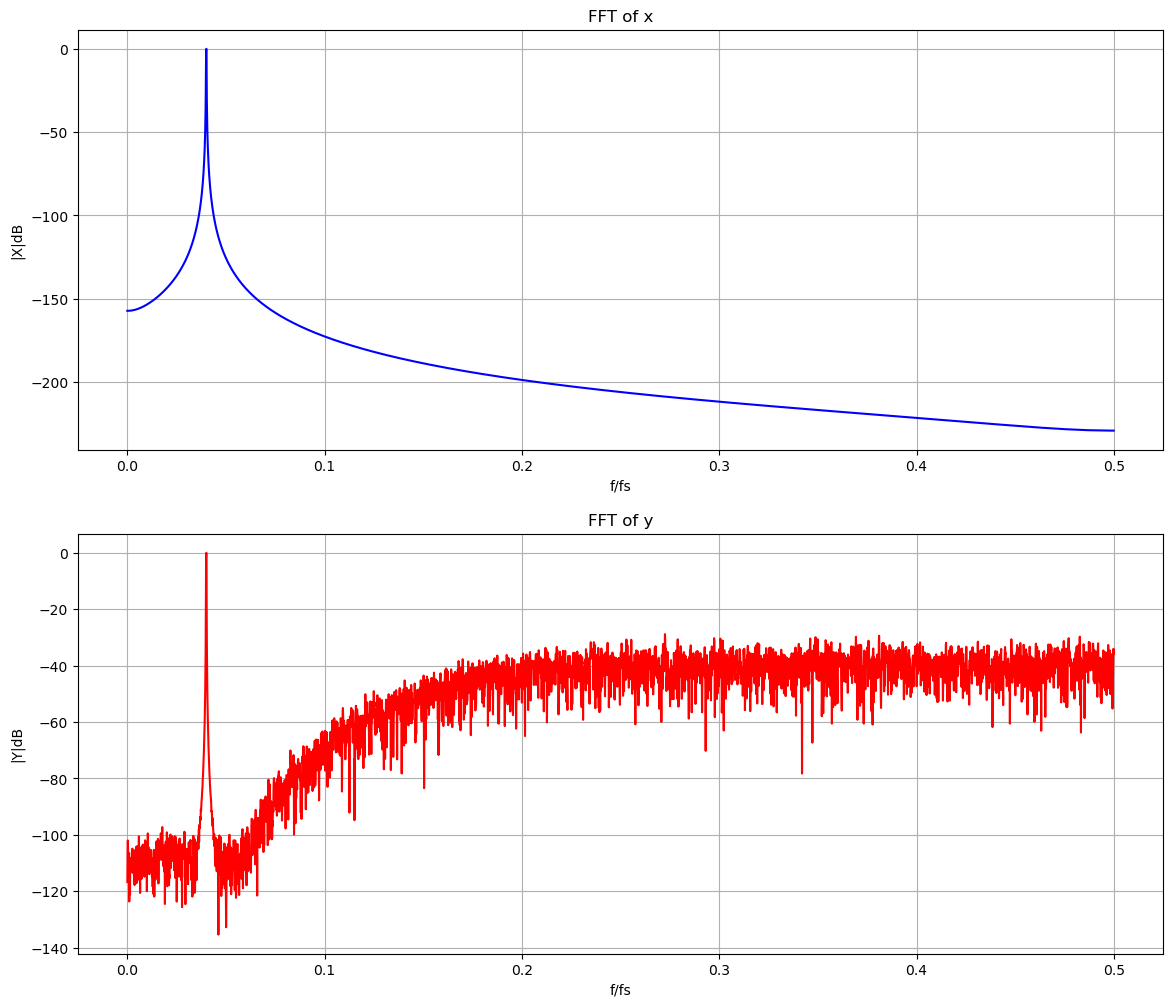

In [6]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Load the numbers from the file into a NumPy array
x = np.loadtxt('../data/sinData.txt')
y = np.loadtxt('../data/sinData_deltaSigma.txt')

w = signal.hann(len(x), False)
x_win = x*w
y_win = y*w

N = len(x)
print(N)

XdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x_win))))[N//2:]
YdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y_win))))[N//2:]

freqs = (np.arange(N) / N - 0.5)[N//2:]

# Plotting
plt.figure(figsize=(14, 12))

# First subplot for XdB
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
plt.plot(freqs, XdB-np.max(XdB), label='XdB', color='blue')
plt.title('FFT of x')
plt.xlabel('f/fs')
plt.ylabel('|X|dB')
plt.grid()

# Second subplot for YdB
plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
plt.plot(freqs, YdB-np.max(YdB), label='YdB', color='red')
plt.title('FFT of y')
plt.xlabel('f/fs')
plt.ylabel('|Y|dB')
plt.grid()
plt.show();

8192.0


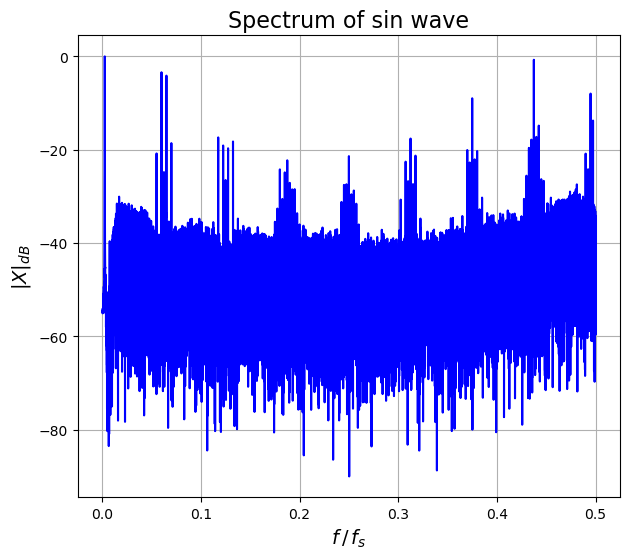

In [7]:
y_serial = np.loadtxt('../data/sinData_serialData.txt')

w = signal.hann(len(y_serial), False)
y_serial_win = y_serial*w

N = len(y_serial)
print(N/16)

YsdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y_serial))))[N//2:]

freqs = (np.arange(N) / N - 0.5)[N//2:]
# Plotting
plt.figure(figsize=(7, 6))

# First subplot for XdB
# plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
plt.plot(freqs, YsdB-np.max(YsdB), label='XdB', color='blue')
# plt.plot([0.5/OSR, 0.5/OSR], [np.min(XdB-np.max(XdB)), np.max(XdB-np.max(XdB))], '--k', linewidth=1)
plt.title(r'Spectrum of sin wave', fontsize=16)
plt.xlabel(r'$f \, / \, f_s$', fontsize=14)
plt.ylabel(r'$|X|_{dB}$', fontsize=14)
plt.grid()

7680.0


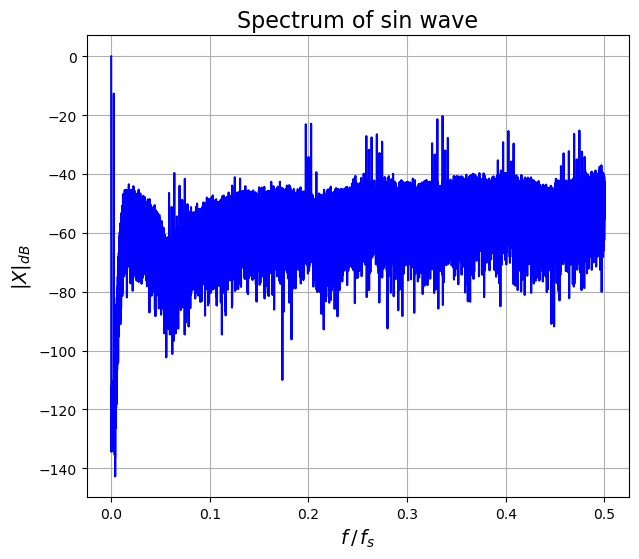

7680.0


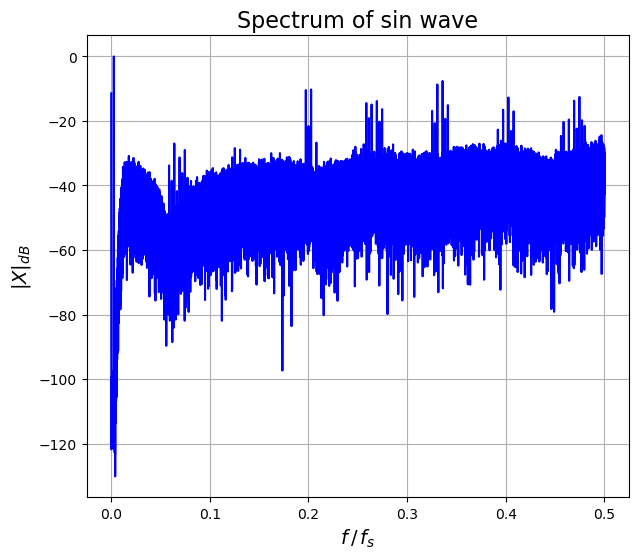

[ 1. -1. -1. ...  1. -1. -1.]


In [44]:
def convert_1b(x, LUT):
    y = []
    for i in range(len(x)):
        pos = int(x[i] + 8)
        tmp = [-1 if val==0 else 1 for val in LUT[-1-pos]]
        y = np.concatenate((y, tmp))
    return np.array(y)

def paralelToSerialConverter(x, LUT):
    y = []

    for i in range(len(x)):
        pos = int(x[i] + 8)
        y = np.concatenate((y, LUT[-1-pos]))
    return np.array(y)

LUT1 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Level 8
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Level 7
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],  # Level 6
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1],  # Level 5
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],  # Level 4
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0],  # Level 3
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1],  # Level 2
    [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # Level 1
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # Level 0
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],  # Level -1
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1],  # Level -2
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],  # Level -3
    [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Level -4
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Level -5
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Level -6
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Level -7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Level -8
]

LUT2 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Level 8
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],  # Level 7
    [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],  # Level 6
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],  # Level 5
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],  # Level 4
    [0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],  # Level 3
    [0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0],  # Level 2
    [0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0],  # Level 1
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # Level 0
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],  # Level -1
    [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],  # Level -2
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Level -3
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Level -4
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],  # Level -5
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Level -6
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],  # Level -7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # Level -8
]

LUT3 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Level 8
    [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],  # Level 7
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],  # Level 6
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1],  # Level 5
    [1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1],  # Level 4
    [1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1],  # Level 3
    [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1],  # Level 2
    [1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1],  # Level 1
    [0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0],  # Level 0
    [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0],  # Level -1
    [0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0],  # Level -2
    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],  # Level -3
    [0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0],  # Level -4
    [0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0],  # Level -5
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # Level -6
    [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  # Level -7
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]   # Level -8    
]

LUT4 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],  # Level 7.5
    [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],  # Level 6.5
    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1],  # Level 5.5
    [1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1],  # Level 4.5
    [1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1],  # Level 3.5
    [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1],  # Level 2.5
    [1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1],  # Level 1.5
    [1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1],  # Level 0.5
    [0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],  # Level -0.5
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0],  # Level -1.5
    [0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],  # Level -2.5
    [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],  # Level -3.5
    [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],  # Level -4.5
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],  # Level -5.5
    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],  # Level -6.5
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Level -7.5
]

LUT5 = [
    [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1],  # Level 7.5
    [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1],  # Level 6.5
    [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1],  # Level 5.5
    [1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1],  # Level 4.5
    [1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1],  # Level 3.5
    [1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1],  # Level 2.5
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1],  # Level 1.5
    [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0],  # Level 0.5
    [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1],  # Level -0.5
    [0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],  # Level -1.5
    [0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0],  # Level -2.5
    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],  # Level -3.5
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],  # Level -4.5
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],  # Level -5.5
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],  # Level -6.5
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]]   # Level -7.5 

y = np.loadtxt('../data/sinData_tmp.txt')
y_serial = paralelToSerialConverter(y, LUT4)

w = signal.hann(len(y_serial), False)
y_serial_win = y_serial*w

N = len(y_serial)
print(N/16)

YsdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y_serial_win))))[N//2:]

freqs = (np.arange(N) / N - 0.5)[N//2:]
# Plotting
plt.figure(figsize=(7, 6))

# First subplot for XdB
# plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
plt.plot(freqs, YsdB-np.max(YsdB), label='XdB', color='blue')
# plt.plot([0.5/OSR, 0.5/OSR], [np.min(XdB-np.max(XdB)), np.max(XdB-np.max(XdB))], '--k', linewidth=1)
plt.title(r'Spectrum of sin wave', fontsize=16)
plt.xlabel(r'$f \, / \, f_s$', fontsize=14)
plt.ylabel(r'$|X|_{dB}$', fontsize=14)
plt.grid()
plt.show()

y_serial = convert_1b(y, LUT4)

w = signal.hann(len(y_serial), False)
y_serial_win = y_serial*w

N = len(y_serial)
print(N/16)

YsdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y_serial_win))))[N//2:]

freqs = (np.arange(N) / N - 0.5)[N//2:]
# Plotting
plt.figure(figsize=(7, 6))

# First subplot for XdB
# plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
plt.plot(freqs, YsdB-np.max(YsdB), label='XdB', color='blue')
# plt.plot([0.5/OSR, 0.5/OSR], [np.min(XdB-np.max(XdB)), np.max(XdB-np.max(XdB))], '--k', linewidth=1)
plt.title(r'Spectrum of sin wave', fontsize=16)
plt.xlabel(r'$f \, / \, f_s$', fontsize=14)
plt.ylabel(r'$|X|_{dB}$', fontsize=14)
plt.grid()
plt.show()

print(y_serial)

In [33]:
print(LUT1[-1])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


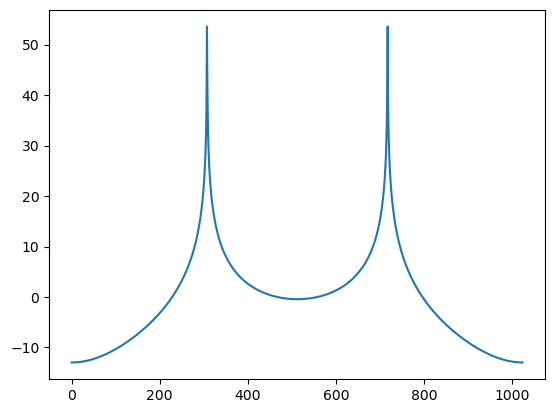

In [37]:
N = 1024
n = np.arange(N)
F = 0.2

x = np.sin(2*np.pi*F*n)
y = convert_1b(x, LUT3)

YdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x))))

plt.plot(YdB)

In [59]:
import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif', size = 18)

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from fxpmath import Fxp
from matplotlib.ticker import MaxNLocator, FuncFormatter
from matplotlib.widgets import SpanSelector
from matplotlib.ticker import FuncFormatter

def plot_fft_dB(signals_x=None, signals_y=None, title1=None, title2=None, legend1=None, legend2=None, 
                xlim1=None, ylim1=None, xlim2=None, ylim2=None, OSR=None):
    """
    Plots the FFT of multiple signals (signals_x and signals_y) in dB scale, normalizes them, and adds 2 dB to the max value.
    
    Args:
    - signals_x: List of signals or a single signal for the first subplot (each signal is a list or array). Can be None.
    - signals_y: List of signals or a single signal for the second subplot (each signal is a list or array). Can be None.
    - title1: Title for the first subplot (optional, default is 'FFT of Signal 1').
    - title2: Title for the second subplot (optional, default is 'FFT of Signal 2').
    - legend1: List of legends for the first subplot (optional, default is None).
    - legend2: List of legends for the second subplot (optional, default is None).
    - xlim1: Tuple specifying the x-axis limits for the first subplot (optional, default is (0, 0.5)).
    - ylim1: Tuple specifying the y-axis limits for the first subplot (optional, auto-calculated).
    - xlim2: Tuple specifying the x-axis limits for the second subplot (optional, default is (0, 0.5)).
    - ylim2: Tuple specifying the y-axis limits for the second subplot (optional, auto-calculated).
    
    Returns:
    - None
    """

    # If signals_x or signals_y is None, handle them gracefully
    plots_to_draw = 0
    if signals_x is not None:
        if not isinstance(signals_x, list):
            signals_x = [signals_x]
        plots_to_draw += 1

    if signals_y is not None:
        if not isinstance(signals_y, list):
            signals_y = [signals_y]
        plots_to_draw += 1

    if plots_to_draw == 0:
        raise ValueError("At least one of signals_x or signals_y must be provided.")

    N = len(signals_x[0]) if signals_x else len(signals_y[0])
    freqs = np.linspace(0, 0.5, N//2)
    fontsize = 8

    fig, axs = plt.subplots(plots_to_draw, 1, figsize=(12, 12))

    # If there's only one plot, axs will not be a list, so we handle it
    if plots_to_draw == 1:
        axs = [axs]

    subplot_idx = 0
    epsilon = 1e-12  # Small value to avoid log of zero

    # Plot for the first subplot (x signals)
    if signals_x is not None:
        if title1 is None:
            title1 = 'FFT of Signal 1'

        max_value_x = float('-inf')
        min_value_x = float('inf')
        for i, x in enumerate(signals_x):
            x_fft = np.fft.fft(x)
            x_dB = 20 * np.log10(np.abs(x_fft[:N//2]) + epsilon)  # Adding epsilon to avoid log of zero
            x_dB -= np.max(x_dB)
            max_value_x = max(max_value_x, np.max(x_dB))
            min_value_x = min(min_value_x, np.min(x_dB))
            axs[subplot_idx].plot(freqs, x_dB, label=legend1[i] if legend1 else f"Signal {i+1}")

        if OSR!=None:
            axs[subplot_idx].plot([0.5/OSR, 0.5/OSR], [ylim1[0], ylim1[1]], '--r')
        axs[subplot_idx].set_title(title1)
        axs[subplot_idx].set_ylabel('Magnitude [dB]')
        axs[subplot_idx].grid(True)

        # Apply custom y-limits for the first subplot, if provided
        if ylim1 is not None:
            axs[subplot_idx].set_ylim(ylim1)
        else:
            axs[subplot_idx].set_ylim(min_value_x - 2, max_value_x + 5)

        # Apply custom x-limits for the first subplot, if provided
        if xlim1 is not None:
            axs[subplot_idx].set_xlim(xlim1)
        else:
            axs[subplot_idx].set_xlim(0, 0.5)

        def format_func(value, tick_number):
            return f'{value:.1f}'

        axs[subplot_idx].yaxis.set_major_formatter(FuncFormatter(format_func))

        if legend1:
            axs[subplot_idx].legend(fontsize=fontsize)

        subplot_idx += 1

    # Plot for the second subplot (y signals)
    if signals_y is not None:
        if title2 is None:
            title2 = 'FFT of Signal 2'

        max_value_y = float('-inf')
        min_value_y = float('inf')
        for i, y in enumerate(signals_y):
            y_fft = np.fft.fft(y)
            y_dB = 20 * np.log10(np.abs(y_fft[:N//2]) + epsilon)  # Adding epsilon to avoid log of zero
            y_dB -= np.max(y_dB)
            max_value_y = max(max_value_y, np.max(y_dB))
            min_value_y = min(min_value_y, np.min(y_dB))
            axs[subplot_idx].plot(freqs, y_dB, label=legend2[i] if legend2 else f"Signal {i+1}")

        if OSR!=None:
            axs[subplot_idx].plot([0.5/OSR, 0.5/OSR], [ylim2[0], ylim2[1]], '--r')
        axs[subplot_idx].set_title(title2)
        axs[subplot_idx].set_xlabel('Normalized Frequency')
        axs[subplot_idx].set_ylabel('Magnitude [dB]')
        axs[subplot_idx].grid(True)

        # Apply custom y-limits for the second subplot, if provided
        if ylim2 is not None:
            axs[subplot_idx].set_ylim(ylim2)
        else:
            axs[subplot_idx].set_ylim(min_value_y - 2, max_value_y + 5)

        # Apply custom x-limits for the second subplot, if provided
        if xlim2 is not None:
            axs[subplot_idx].set_xlim(xlim2)
        else:
            axs[subplot_idx].set_xlim(0, 0.5)

        axs[subplot_idx].yaxis.set_major_formatter(FuncFormatter(format_func))

        if legend2:
            axs[subplot_idx].legend(fontsize=fontsize)

    plt.tight_layout()
    plt.show()

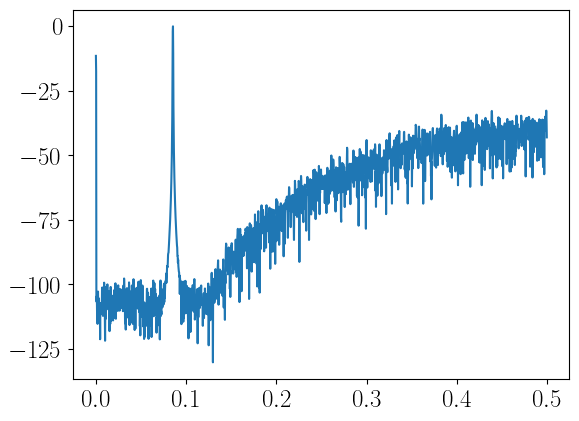

In [83]:
y = np.loadtxt('../data/sinData_tmp.txt')
w = signal.hann(len(y), False)
y_win = y*w

y1b = convert_1b(y, LUT4)
w = signal.hann(len(y1b), False)
y1b_win = y1b*w

# plot_fft_dB(y1b_win, y1b_win, ylim1=(-120, 10), ylim2=(-120, 10))

N = len(y1b_win) // 32
epsilon = 1e-12

freqs = (np.arange(N) / N)[:N//2]

y_fft = np.fft.fft(y1b_win)
y_dB = 20 * np.log10(np.abs(y_fft[:N//2]) + epsilon)  # Adding epsilon to avoid log of zero
y_dB -= np.max(y_dB)
# max_value_y = max(max_value_y, np.max(y_dB))
# min_value_y = min(min_value_y, np.min(y_dB))
plt.plot(freqs, y_dB)
# plt.xlim([0, len(y1b)/32])

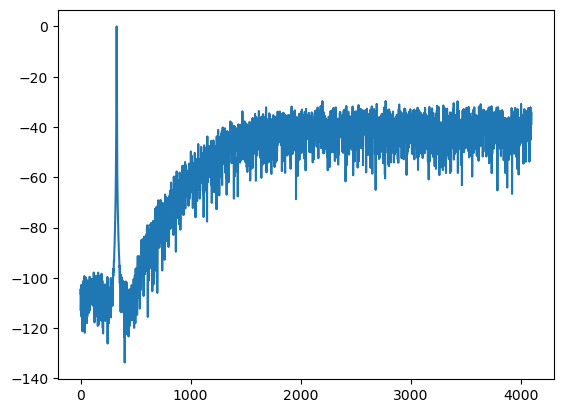

In [53]:
w = signal.hann(len(y), False)
y_win = y*w

YdB = 20*np.log10(np.abs(np.fft.fftshift(np.fft.fft(y_win))))[N//2:]
plt.plot(YdB-np.max())

In [2]:
import numpy as np
import scipy.signal as signal
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# Enable LaTeX rendering
plt.rc('text', usetex=True)
plt.rc('font', family='serif')


def read_file_with_header(file_path):
    """
    Reads a file with metadata in the header and numerical data below.
    
    Args:
        file_path (str): Path to the input file.
    
    Returns:
        dict: Metadata key-value pairs.
        np.ndarray: Numerical data as a NumPy array.
    """
    metadata = {}
    data = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                key_value = line[1:].strip().split("=")  # Metadata in format `key=value`
                if len(key_value) == 2:
                    key, value = key_value[0].strip(), key_value[1].strip()
                    try:
                        # Convert numeric metadata to float if possible
                        metadata[key] = float(value) if value.replace('.', '', 1).isdigit() else value
                    except ValueError:
                        metadata[key] = value
            else:
                try:
                    data.append(float(line.strip()))  # Assuming float values in the data
                except ValueError:
                    pass  # Ignore non-numeric lines

    return metadata, np.array(data)


def assign_metadata_to_variables(metadata):
    """
    Assign metadata values to local variables based on keys.
    
    Args:
        metadata (dict): Metadata key-value pairs.
    
    Returns:
        dict: A dictionary containing local variables for each metadata key.
    """
    local_vars = {}
    for key, value in metadata.items():
        local_vars[key] = value  # Store metadata as local variables in a dictionary
    return local_vars


# Read data and metadata
x_meta, x = read_file_with_header('../data/sinData.txt')
y_meta, y = read_file_with_header('../data/sinData_deltaSigma.txt')
y_serial_meta, y_serial = read_file_with_header('../data/sinData_serialData.txt')

# Assign metadata to local variables
x_vars = assign_metadata_to_variables(x_meta)
y_vars = assign_metadata_to_variables(y_meta)
y_serial_vars = assign_metadata_to_variables(y_serial_meta)

# Example usage of metadata
OSR = int(x_vars.get("OSR", 8))  # Use default OSR=8 if not found in metadata
fs = x_vars.get("fs", None)

print(f"Metadata for x: {x_vars}")
print(f"Metadata for y: {y_vars}")
print(f"Metadata for y_serial: {y_serial_vars}")

# Process and plot data
w = signal.hann(len(x), False)
x_win = x * w
y_win = y * w

N = len(x)

XdB = 20 * np.log10(np.abs(np.fft.fftshift(np.fft.fft(x_win))))[N // 2:]
YdB = 20 * np.log10(np.abs(np.fft.fftshift(np.fft.fft(y_win))))[N // 2:]

freqs = (np.arange(N) / N - 0.5)[N // 2:]

# Plotting
plt.figure(figsize=(14, 12))

# First subplot for XdB
plt.subplot(2, 1, 1)  # 2 rows, 1 column, subplot 1
plt.plot(freqs, XdB - np.max(XdB), label='XdB', color='blue')
plt.plot([0.5 / OSR, 0.5 / OSR], [np.min(XdB - np.max(XdB)), np.max(XdB - np.max(XdB))], '--k', linewidth=1)
plt.title(r'Spectrum of sin wave', fontsize=16)
plt.xlabel(r'$f \, / \, f_s$', fontsize=14)
plt.ylabel(r'$|X|_{dB}$', fontsize=14)
plt.grid()

# Second subplot for YdB
plt.subplot(2, 1, 2)  # 2 rows, 1 column, subplot 2
plt.plot(freqs, YdB - np.max(YdB), label='YdB', color='red')
plt.plot([0.5 / OSR, 0.5 / OSR], [np.min(YdB - np.max(YdB)), np.max(YdB - np.max(YdB))], '--k', linewidth=1)
plt.title(r'Spectrum of modulated sin wave', fontsize=16)
plt.xlabel(r'$f \, / \, f_s$', fontsize=14)
plt.ylabel(r'$|Y|_{dB}$', fontsize=14)
plt.grid()

plt.savefig("../figs/sinData_deltaSigma.png")

# Process y_serial
w = signal.hann(len(y_serial), False)
y_serial_win = y_serial * w

N = len(y_serial)

YsdB = 20 * np.log10(np.abs(np.fft.fftshift(np.fft.fft(y_serial_win))))[N // 2:]

freqs = (np.arange(N) / N - 0.5)[N // 2:]

# Plotting
plt.figure(figsize=(14, 6))

# Plot YsdB
plt.plot(freqs, YsdB - np.max(YsdB), label='YsdB', color='blue')
plt.title(r'Spectrum of serialized data', fontsize=16)
plt.xlabel(r'$f \, / \, f_s$', fontsize=14)
plt.ylabel(r'$|Y|_{dB}$', fontsize=14)
plt.grid()

plt.savefig("../figs/sinData_serialData.png")


Metadata for x: {'OSR': 8.0, 'fs': 10000.0}
Metadata for y: {'OSR': 8.0, 'fs': 10000.0}
Metadata for y_serial: {'OSR': 8.0, 'fs': 10000.0}


ValueError: operands could not be broadcast together with shapes (4213,) (8192,) 

In [9]:
print(len(x), len(y))

8192 4213


In [12]:
print(y_serial)

[0. 1. 1. ... 1. 1. 1.]
